Data from 1 - TIRUVALLUR.csv:
   S.No              Candidate                             Party  EVM Votes  \
0     1      Sasikanth Senthil          Indian National Congress     794608   
1     2  Balaganapathy, V. Pon            Bharatiya Janata Party     224042   
2     3        Nallathambi, K.  Desiya Murpokku Dravida Kazhagam     223550   
3     4   Jagadesh Chander, M.               Naam Tamilar Katchi     120620   
4     5        Tamizhmadhi, D.               Bahujan Samaj Party      13772   

   Postal Votes  Total Votes  Percentage of votes  
0          2348       796956                56.21  
1           759       224801                15.86  
2           354       223904                15.79  
3           218       120838                 8.52  
4            38        13810                 0.97  
Data from 10 - DHARMAPURI.csv:
   S.No         Candidate                                     Party  \
0     1          MANI. A.                 Dravida Munnetra Kazhagam   
1     2  S

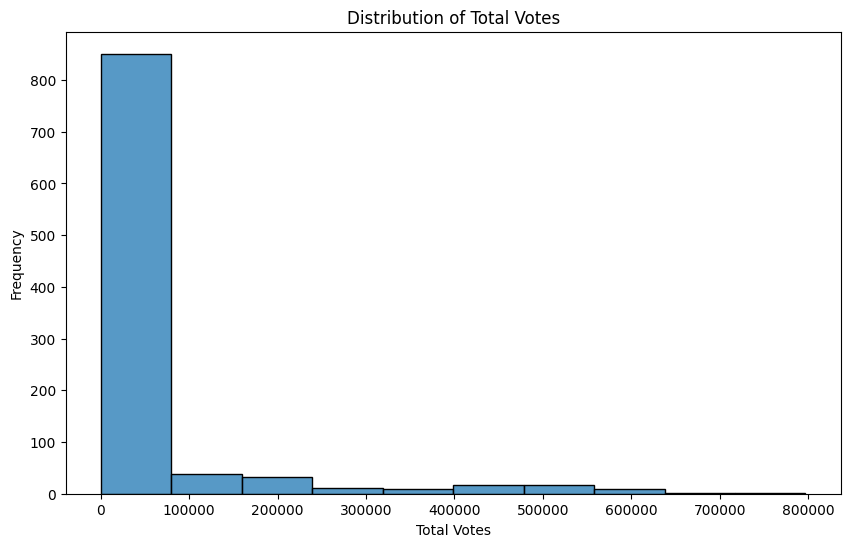

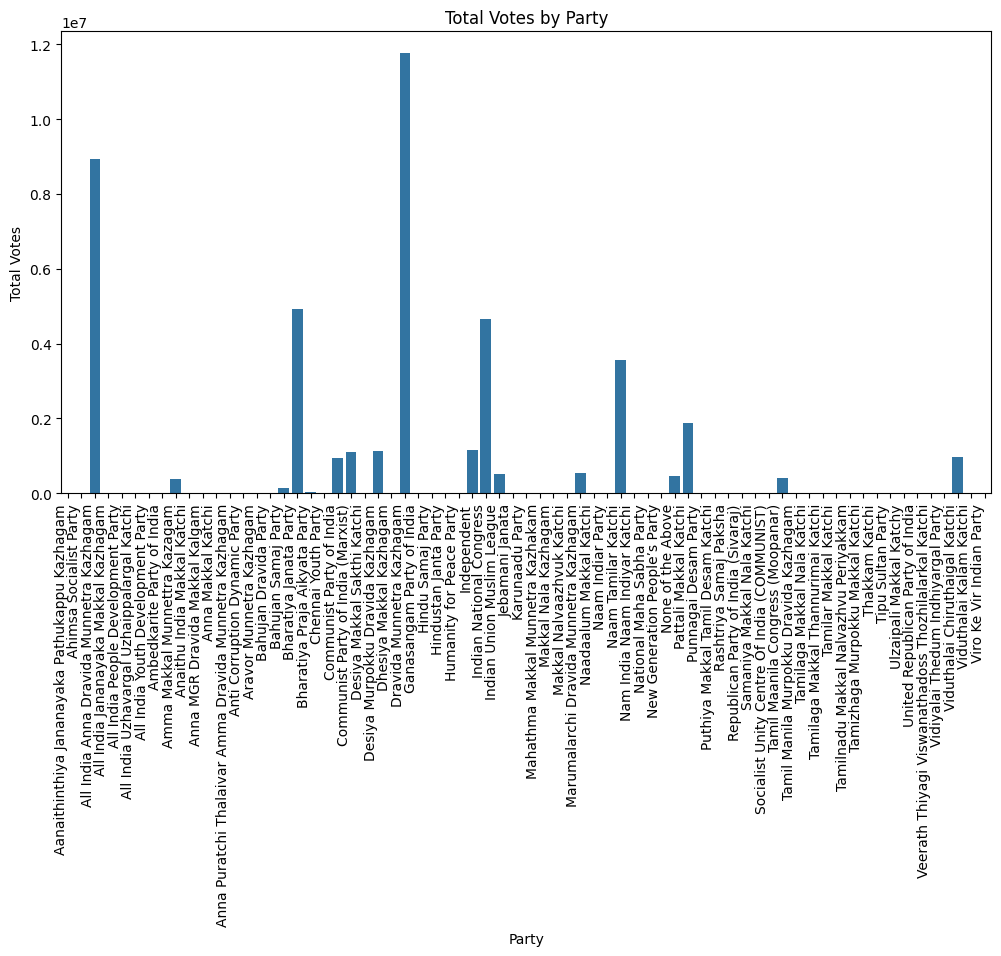

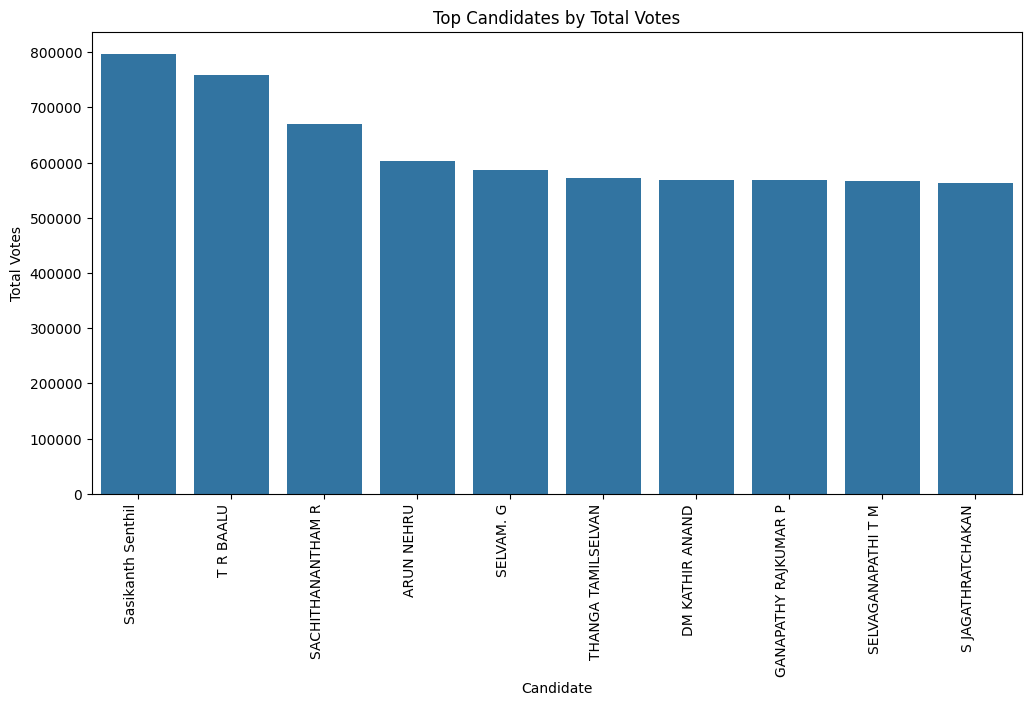

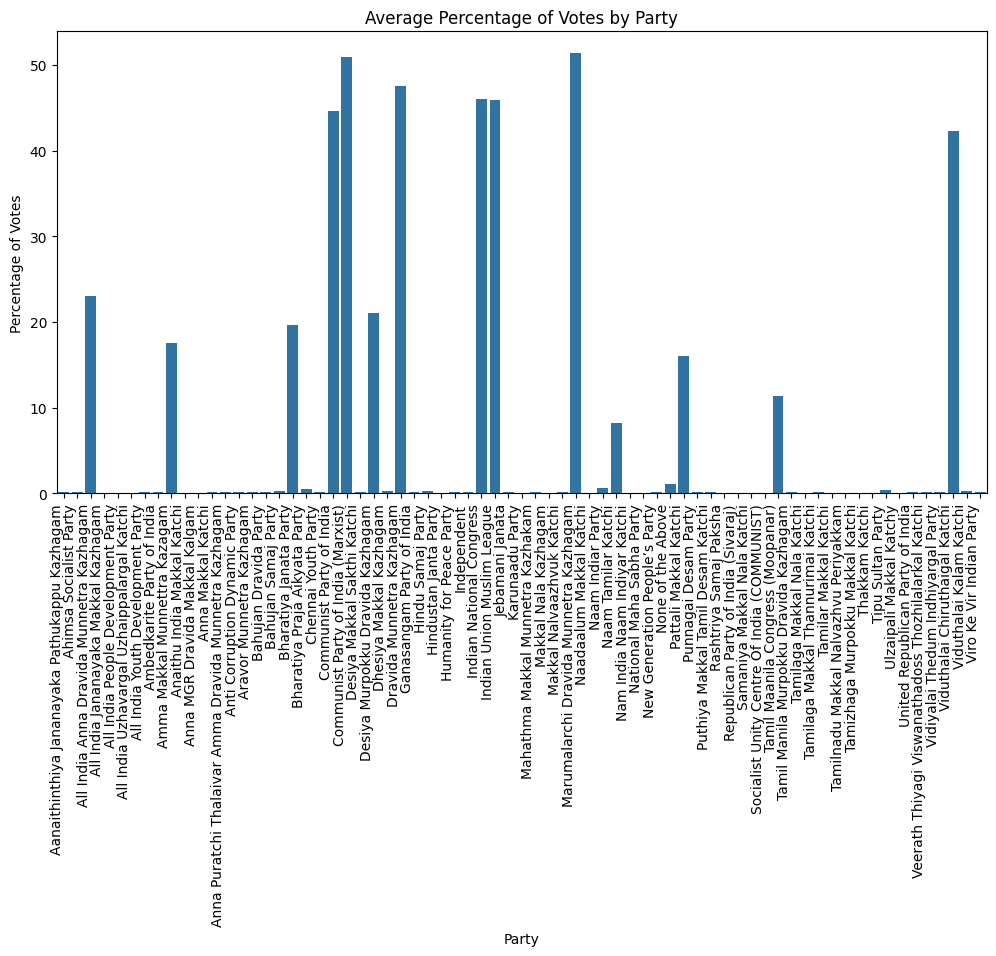

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder path containing CSV files
folder_path = r'C:\Users\Muskan\OneDrive\Desktop\Kalvium Task\Tamil Nadu'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

all_data = []

for file in csv_files:
    try:
        # Construct full file path
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Print first few rows for debugging
        print(f"Data from {file}:")
        print(df.head())
        
        # Convert all columns to strings to ensure .str accessor works
        df = df.astype(str)
        
        # Clean data
        df.dropna(inplace=True)
        
        # Replace non-numeric values with 0
        df['EVM Votes'] = df['EVM Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Postal Votes'] = df['Postal Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Total Votes'] = df['Total Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Percentage of votes'] = df['Percentage of votes'].str.replace('%', '').replace('-', '0').astype(float)
        
        # Append data to the list
        all_data.append(df)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate all DataFrames into one
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Save the combined data to a new CSV file
    combined_df.to_csv('Combined_Election_Results.csv', index=False)

    # Perform Data Analysis and Visualization
    # Basic statistics
    print(combined_df.describe())

    # Distribution of total votes
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Total Votes'], bins=10)
    plt.title('Distribution of Total Votes')
    plt.xlabel('Total Votes')
    plt.ylabel('Frequency')
    plt.show()

    # Party-wise total votes
    party_votes = combined_df.groupby('Party')['Total Votes'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Total Votes', data=party_votes)
    plt.title('Total Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90, ha='right')
    plt.show()

    # Top candidates by total votes
    top_candidates = combined_df.sort_values(by='Total Votes', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Candidate', y='Total Votes', data=top_candidates)
    plt.title('Top Candidates by Total Votes')
    plt.xlabel('Candidate')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90, ha='right')
    plt.show()

    # Party-wise percentage of votes
    party_percentage = combined_df.groupby('Party')['Percentage of votes'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Percentage of votes', data=party_percentage)
    plt.title('Average Percentage of Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Percentage of Votes')
    plt.xticks(rotation=90, ha='right')
    plt.show()
else:
    print("No data to process.")